In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
# We load Fake.csv and True.csv
fake_df = pd.read_csv('Fake.csv')
real_df = pd.read_csv('True.csv')
fake_df = fake_df[['title', 'text']]
real_df = real_df[['title', 'text']]
fake_df['class'] = 0
real_df['class'] = 1
df = pd.concat([fake_df, real_df], ignore_index=True, sort=False)
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text  class  
0  WASHINGTON (Reuters) - The head of a conservat...      0  
1  WASHINGTON (Reuters) - Transgender people will...      0  
2  WASHINGTON (Reuters) - The special counsel inv...      0  
3  WASHINGTON (Reuters) - Trump campaign adviser ...      0  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...      0

In [2]:
df['title_text'] = df['title'] + ' ' + df['text']
df.drop(['title', 'text'], axis=1, inplace=True)
df.head()

class                                         title_text
0      0  As U.S. budget fight looms, Republicans flip t...
1      0  U.S. military to accept transgender recruits o...
2      0  Senior U.S. Republican senator: 'Let Mr. Muell...
3      0  FBI Russia probe helped by Australian diplomat...
4      0  Trump wants Postal Service to charge 'much mor...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       44898 non-null  int64 
 1   title_text  44898 non-null  object
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


<AxesSubplot:xlabel='class', ylabel='count'>

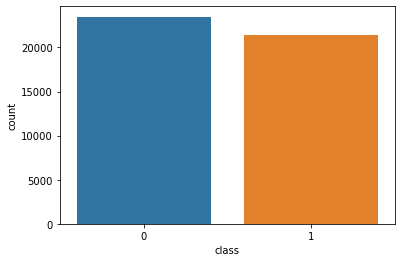

In [4]:
import seaborn as sns
sns.countplot(x="class", data = df)

In [ ]:
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import string 
from nltk.stem import WordNetLemmatizer

In [ ]:
Tweet = []
Labels = []

for row in df["title_text"]:
    #tokenize words
    words = word_tokenize(row)
    #remove punctuations
    clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
    #remove stop words
    english_stops = set(stopwords.words('english'))
    characters_to_remove = ["''",'``',"rt","https","’","“","”","\u200b","--","n't","'s","...","//t.c" ]
    clean_words = [word for word in clean_words if word not in english_stops]
    clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
    #Lematise words
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words]
    Tweet.append(lemma_list)

In [ ]:
X = df['title_text']
y = df['class']

In [ ]:
# Extract Feature With CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Step 1: Data Collection (Assuming you have a DataFrame 'df' with a 'text' column)
# Load your dataset
df = pd.read_csv('Fake.csv')  # Replace with your dataset path

# Step 2: Text Preprocessing
# Basic text cleaning
df['text'] = df['text'].str.replace('[^a-zA-Z ]', '', regex=True).str.lower()

# Step 3: Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()

# Step 4: Unsupervised Learning (Clustering)
num_clusters = 2  # Set the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Prepare pseudo-labels for MLP training
y = df['cluster']  # Using clusters as pseudo-labels

# Step 5: Train the MLP
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the model
accuracy = mlp.score(X_test, y_test)
accuracy = mlp.score(X_train, y_train)
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Train Accuracy: {accuracy:.2f}')

Test Accuracy: 1.00
Train Accuracy: 1.00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
def predict_news(news_article):
    # Preprocess the news article (same as training data)
    news_article = news_article.lower()  # Convert to lowercase
    news_article = ''.join([char for char in news_article if char.isalpha() or char.isspace()])  # Remove non-alphabetic characters

    # Transform the news article using the same TfidfVectorizer used for training
    news_feature = vectorizer.transform([news_article]).toarray()

    # Make the prediction
    prediction = mlp.predict(news_feature)

    # Convert prediction to readable format
    if prediction == 0:
        return "Fake News"
    else:
        return "Real News"

# Example of predicting a new news article
new_article = input("Enter the news article you want to predict: ")
prediction = predict_news(new_article)
print(f"Prediction: {prediction}")